In [1]:
#load dataset
import pandas as pd
data = pd.read_csv("raisin.csv")



In [2]:
#preprocess data
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

imputer = SimpleImputer(strategy='mean')
data.fillna(data.mean(), inplace=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_scaled)



In [3]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_normalized[:, :-1], data['Class'], test_size=0.2, random_state=42)



In [7]:
#train the model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#test the model
nb_test_accuracy = nb_model.score(X_test, y_test)
print(f"Naive Bayes Test Accuracy: {nb_test_accuracy}")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = nb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)




Naive Bayes Test Accuracy: 0.8333333333333334
Mean Squared Error (MSE): 0.16666666666666666
Root Mean Squared Error (RMSE): 0.408248290463863
Mean Absolute Error (MAE): 0.16666666666666666
R-squared (R2) Score: 0.3320138545274617


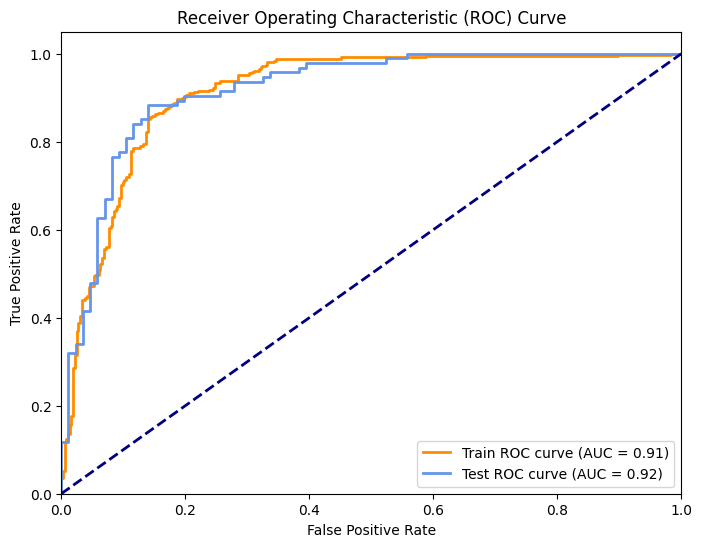

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#compute predictions
y_pred_train = nb_model.predict_proba(X_train)[:, 1]
y_pred_test = nb_model.predict_proba(X_test)[:, 1]

#compute roc curve and auc for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

#compute roc curve and auc for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

#plot roc curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:

#overfitting analysis
train_accuracy = nb_model.score(X_train, y_train)
test_accuracy = nb_model.score(X_test, y_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.8263888888888888
Test Accuracy: 0.8333333333333334
